# WeatherPy
----

#### Analysis
1) Lat vs Temp: although it 'seems' at first glance that the northern hemisphere is colder than the southern hemisphere, in fact, there are less cities plotted within the southern hemisphere, and therefore the data is not represented to the same degree for '-40 to -80' lat vs. '40 to 80' lat, where there is more representation of cities.  
2) Lat vs Humidity: a cluster seems to be formed around 40-60 lat, but this could be due to the sample of data produced. A way to mitigate this would have been to split the latitudes & longitudes into 4 quadrants, and then randomly assigning them together to ensure a fair representation around the globe.                                    
3) Lat vs Cloudiness: cloudiness looks to be rounded with most citings of 20%, 40%, 75%, 90% and 100%.                 
4) Lat & wind speed: do not look correlated, rare for windspeed to be over 20 mph. 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Check URL
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=


In [22]:
# Set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [23]:
# Loop through cities, make weather API requests, append desired results (with print log of city name, number)
record_count = 1
set_count = 1

for i, city in enumerate (cities):
    time.sleep(1)
    if (i%50==0 and i>=50):
        set_count +=1
        record_count = 0
    print (f"Processing Record {record_count} of Set {set_count} | {city} \n")
    print (f"{query_url}{city}\n")
    record_count += 1
    
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print(f"City Not Found, Skipped.")
        pass
    

Processing Record 1 of Set 1 | rikitea 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=rikitea

Processing Record 2 of Set 1 | ilulissat 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ilulissat

Processing Record 3 of Set 1 | carros 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=carros

Processing Record 4 of Set 1 | kapaa 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kapaa

Processing Record 5 of Set 1 | barrow 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=barrow

Processing Record 6 of Set 1 | ambovombe 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ambovombe

Processing Record 7 of Set 1 | bambous virieux 

http://api.openweathermap.org/dat

Processing Record 2 of Set 2 | avera 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=avera

Processing Record 3 of Set 2 | cervo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=cervo

Processing Record 4 of Set 2 | busselton 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=busselton

Processing Record 5 of Set 2 | mapimi 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=mapimi

Processing Record 6 of Set 2 | poum 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=poum

Processing Record 7 of Set 2 | aswan 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=aswan

Processing Record 8 of Set 2 | vila franca do campo 

http://api.openweathermap.org/data/2.5/weath

Processing Record 4 of Set 3 | carnarvon 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=carnarvon

Processing Record 5 of Set 3 | jega 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=jega

Processing Record 6 of Set 3 | sosnogorsk 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=sosnogorsk

Processing Record 7 of Set 3 | port alfred 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=port alfred

Processing Record 8 of Set 3 | hammerfest 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=hammerfest

Processing Record 9 of Set 3 | kupang 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kupang

Processing Record 10 of Set 3 | mascote 

http://api.openweatherma

Processing Record 7 of Set 4 | sorong 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=sorong

Processing Record 8 of Set 4 | ixtapa 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ixtapa

Processing Record 9 of Set 4 | miraflores 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=miraflores

Processing Record 10 of Set 4 | arraial do cabo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=arraial do cabo

Processing Record 11 of Set 4 | qaanaaq 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=qaanaaq

Processing Record 12 of Set 4 | souillac 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=souillac

Processing Record 13 of Set 4 | vikhorevka 

http://api.ope

Processing Record 9 of Set 5 | san patricio 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=san patricio

Processing Record 10 of Set 5 | wahiawa 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=wahiawa

Processing Record 11 of Set 5 | porto novo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=porto novo

Processing Record 12 of Set 5 | itarema 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=itarema

Processing Record 13 of Set 5 | yar-sale 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=yar-sale

Processing Record 14 of Set 5 | dharchula 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=dharchula

Processing Record 15 of Set 5 | ukiah 

http://api.open

Processing Record 11 of Set 6 | umm lajj 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=umm lajj

Processing Record 12 of Set 6 | visby 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=visby

Processing Record 13 of Set 6 | gambela 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=gambela

Processing Record 14 of Set 6 | hithadhoo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=hithadhoo

Processing Record 15 of Set 6 | kapustin yar 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kapustin yar

Processing Record 16 of Set 6 | erenhot 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=erenhot

Processing Record 17 of Set 6 | bethel 

http://api.openweatherm

Processing Record 13 of Set 7 | necochea 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=necochea

Processing Record 14 of Set 7 | zhangzhou 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=zhangzhou

Processing Record 15 of Set 7 | esperance 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=esperance

Processing Record 16 of Set 7 | nouadhibou 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=nouadhibou

Processing Record 17 of Set 7 | flin flon 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=flin flon

Processing Record 18 of Set 7 | meulaboh 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=meulaboh

Processing Record 19 of Set 7 | winsum 

http://api.op

Processing Record 15 of Set 8 | aden 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=aden

Processing Record 16 of Set 8 | mount hagen 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=mount hagen

Processing Record 17 of Set 8 | port hardy 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=port hardy

Processing Record 18 of Set 8 | katsuura 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=katsuura

Processing Record 19 of Set 8 | thompson 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=thompson

Processing Record 20 of Set 8 | areal 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=areal

Processing Record 21 of Set 8 | boende 

http://api.openweathermap.o

Processing Record 17 of Set 9 | salalah 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=salalah

Processing Record 18 of Set 9 | soe 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=soe

Processing Record 19 of Set 9 | ust-kuyga 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ust-kuyga

Processing Record 20 of Set 9 | christchurch 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=christchurch

Processing Record 21 of Set 9 | marzuq 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=marzuq

Processing Record 22 of Set 9 | auki 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=auki

Processing Record 23 of Set 9 | aliwal north 

http://api.openweathermap.org/d

Processing Record 19 of Set 10 | mayo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=mayo

Processing Record 20 of Set 10 | bara 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=bara

Processing Record 21 of Set 10 | acari 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=acari

Processing Record 22 of Set 10 | ola 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ola

Processing Record 23 of Set 10 | megion 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=megion

Processing Record 24 of Set 10 | sovetskiy 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=sovetskiy

Processing Record 25 of Set 10 | cockburn town 

http://api.openweathermap.org/data/2.5/weat

Processing Record 21 of Set 11 | puerto ayacucho 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=puerto ayacucho

Processing Record 22 of Set 11 | boyolangu 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=boyolangu

Processing Record 23 of Set 11 | walvis bay 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=walvis bay

Processing Record 24 of Set 11 | mount gambier 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=mount gambier

Processing Record 25 of Set 11 | betioky 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=betioky

Processing Record 26 of Set 11 | vaitupu 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=vaitupu

City Not Found, Skipped.
Process

Processing Record 23 of Set 12 | ponta delgada 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ponta delgada

Processing Record 24 of Set 12 | lovozero 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=lovozero

Processing Record 25 of Set 12 | kieta 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kieta

Processing Record 26 of Set 12 | vokhtoga 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=vokhtoga

Processing Record 27 of Set 12 | sussex 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=sussex

Processing Record 28 of Set 12 | rehoboth 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=rehoboth

Processing Record 29 of Set 12 | sidi ali 

http://api.ope

In [24]:
#Check that data was captured properly
print(f"City:       {city_name}")
print(f"Cloudiness: {cloudiness}")
print(f"Country:    {country}")
print(f"Date:       {date}")
print(f"Humidity:   {humidity}")
print(f"Lat:        {lat}")
print(f"Lng:        {lng}")
print(f"Max Temp:   {max_temp}")
print(f"Wind Speed: {wind_speed}")

City:       ['Rikitea', 'Ilulissat', 'Carros', 'Kapaa', 'Barrow', 'Ambovombe', 'Bambous Virieux', 'Hilo', 'Mar del Plata', 'Hobart', 'Bayonet Point', 'Puerto del Rosario', 'Nanortalik', 'Vardo', 'Upernavik', 'Pemangkat', 'Luderitz', 'Bongandanga', 'Yellowknife', 'Hamilton', 'Kaitangata', 'Ribeira Grande', 'Muroto', 'Yarim', 'Lebu', 'Nova Serrana', 'Ushuaia', 'Bluff', 'Tasiilaq', 'Punta Arenas', 'Hofn', 'Albany', 'Khapa', 'Mataura', "Severo-Kuril'sk", 'Bathsheba', 'Puerto Ayora', 'Wanning', 'George Town', 'Sitka', 'Alofi', 'Hirara', 'Chokurdakh', 'Avarua', 'Mahebourg', 'Dingle', 'Lompoc', 'Lorengau', 'Lucapa', 'Avera', 'Cervo', 'Busselton', 'Mapimi', 'Poum', 'Aswan', 'Vila Franca do Campo', 'Kenai', 'Yatou', 'Roald', 'Cancun', 'Mecca', 'Honiara', 'Kodiak', 'Saint-Philippe', 'Nikolskoye', 'Tura', 'Kruisfontein', 'Eyl', 'Butaritari', 'Jocotan', 'Gunupur', 'Nacala', 'Whitianga', 'Steinkjer', 'Seoul', 'Presidencia Roque Saenz Pena', 'Boulder', 'Tuktoyaktuk', 'Vaini', 'Hasaki', 'Linjiang', '

In [25]:
#Check that lengths are equal
print(len(city_name))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(wind_speed))

555
555
555
555
555
555
555
555
555


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [27]:
# Build a dataframe from the lists
weather_data = {"City": city_name, 
                "Cloudiness (%)": cloudiness, 
                "Country": country, 
                "Date": date, 
                "Humidity (%)": humidity, 
                "Lat": lat, 
                "Lng": lng, 
                "Max Temp (F)": max_temp, 
                "Wind Speed (mph)": wind_speed
}

weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Rikitea,81,PF,1579543702,79,-23.12,-134.97,77.47,11.50
1,Ilulissat,40,GL,1579543505,50,69.22,-51.10,6.80,25.28
2,Carros,75,FR,1579543704,46,43.79,7.18,53.60,23.04
3,Kapaa,40,US,1579543599,69,22.08,-159.32,73.40,11.41
4,Barrow,90,US,1579543706,91,71.29,-156.79,-0.40,6.93


In [37]:
weather_data.to_csv(output_data_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

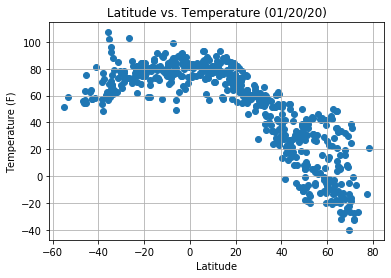

In [39]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

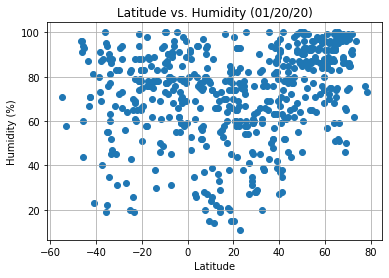

In [31]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

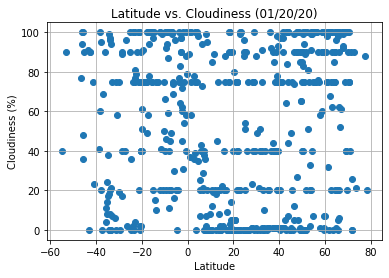

In [32]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

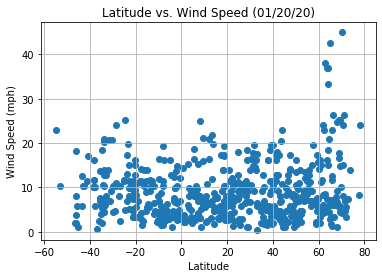

In [34]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed (mph)"], marker="o", )

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_WindSpeed.png")

# Show plot
plt.show()